<a href="https://colab.research.google.com/github/marcus-tam/ws_selenium_trader/blob/main/sma_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pip install required packages and import

In [47]:
!pip install yfinance

In [48]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web
from pprint import PrettyPrinter
import yfinance as yf

Set plot style to dark background (gamer time)

PP is used for printing with natural indents (used in .py version but not necessary for .ipynp)

set up SMA 30 and SMA 100

set up start and end times.


In [49]:
plt.style.use("dark_background")
pp = PrettyPrinter(indent=4)

ma_1 = 30
ma_2 = 100

start = dt.datetime.now() - dt.timedelta(days=365*3)
end = dt.datetime.now()

Download ticker data

In [50]:
data = yf.download('MSFT', start=start, end = end)
pp.pprint(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2018-07-13  104.370003  105.599998  ...  101.501434  24635200
2018-07-16  105.400002  105.820000  ...  101.000809  21786900
2018-07-17  104.610001  106.500000  ...  102.002060  25901700
2018-07-18  105.940002  106.050003  ...  101.202988  29493900
2018-07-19  104.930000  105.309998  ...  100.509819  40171600
...                ...         ...  ...         ...       ...
2021-07-06  278.029999  279.369995  ...  277.660004  31565600
2021-07-07  279.399994  280.690002  ...  279.929993  23260000
2021-07-08  276.899994  278.730011  ...  277.420013  24618600
2021-07-09  275.720001  278.049988  ...  277.940002  23905500
2021-07-12  279.157013  279.750000  ...  277.320007  16376943

[754 rows x 6 columns]


Add new fields in dataframe. SMA_30 and SMA_100

In [51]:
data[f'SMA_{ma_1}'] = data['Close'].rolling(window=ma_1).mean()
data[f'SMA_{ma_2}'] = data['Close'].rolling(window=ma_2).mean()

print(data)

                  Open        High  ...      SMA_30     SMA_100
Date                                ...                        
2018-07-13  104.370003  105.599998  ...         NaN         NaN
2018-07-16  105.400002  105.820000  ...         NaN         NaN
2018-07-17  104.610001  106.500000  ...         NaN         NaN
2018-07-18  105.940002  106.050003  ...         NaN         NaN
2018-07-19  104.930000  105.309998  ...         NaN         NaN
...                ...         ...  ...         ...         ...
2021-07-06  278.029999  279.369995  ...  259.276333  248.407499
2021-07-07  279.399994  280.690002  ...  260.247999  248.761899
2021-07-08  276.899994  278.730011  ...  261.104666  249.086199
2021-07-09  275.720001  278.049988  ...  261.986333  249.428599
2021-07-12  279.157013  279.750000  ...  262.920000  249.759799

[754 rows x 8 columns]


Create variables to store when to buy and sell.

Trigger is used as a lock mechanism so we don't have multiple buy and sell orders when SMA's cross for extended periods of time.

In [52]:
buy_signals = []
sell_signals = []
trigger = 0

Loop through data dataframe. 

If SMA30 is greater than SMA100 (and trigger lock mechanism is satisfied): append new buy point.

Else if SMA30 is less than SMA100 (and trigger lock mechanism is satisfied);
append new sell point.

else: append 'NAN' values. 

In [53]:
for x in range(len(data)):
    if data[f"SMA_{ma_1}"].iloc[x] > data[f'SMA_{ma_2}'].iloc[x] and trigger != 1:
        buy_signals.append(data['Close'].iloc[x])
        sell_signals.append(float('nan'))
        trigger = 1
    elif data[f"SMA_{ma_1}"].iloc[x] < data[f'SMA_{ma_2}'].iloc[x] and trigger != -1:
        buy_signals.append(float('nan'))
        sell_signals.append(data['Close'].iloc[x])
        trigger = -1
    else:
        buy_signals.append(float('nan'))
        sell_signals.append(float('nan'))

Add new buy and sells to data dataframe

In [54]:
data['Buy Signals'] = buy_signals
data['Sell Signals'] = sell_signals

print(data)

                  Open        High  ...  Buy Signals  Sell Signals
Date                                ...                           
2018-07-13  104.370003  105.599998  ...          NaN           NaN
2018-07-16  105.400002  105.820000  ...          NaN           NaN
2018-07-17  104.610001  106.500000  ...          NaN           NaN
2018-07-18  105.940002  106.050003  ...          NaN           NaN
2018-07-19  104.930000  105.309998  ...          NaN           NaN
...                ...         ...  ...          ...           ...
2021-07-06  278.029999  279.369995  ...          NaN           NaN
2021-07-07  279.399994  280.690002  ...          NaN           NaN
2021-07-08  276.899994  278.730011  ...          NaN           NaN
2021-07-09  275.720001  278.049988  ...          NaN           NaN
2021-07-12  279.157013  279.750000  ...          NaN           NaN

[754 rows x 10 columns]


Create new plot 

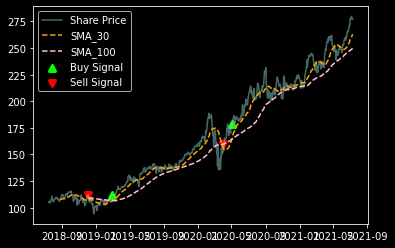

In [55]:
plt.plot(data['Close'], label = "Share Price", alpha=0.5)
plt.plot(data[f"SMA_{ma_1}"], label = f"SMA_{ma_1}", color="orange", linestyle="--")
plt.plot(data[f"SMA_{ma_2}"], label = f"SMA_{ma_2}", color="pink", linestyle="--")
plt.scatter(data.index, data['Buy Signals'], label="Buy Signal", marker="^", color="#00ff00", lw = 3)
plt.scatter(data.index, data['Sell Signals'], label="Sell Signal", marker="v", color="#ff0000", lw = 3)
plt.legend(loc="upper left")
plt.show()